## Visualizing n random or representative cell in a given well
- Inputs are:
    -  **file_name** - .sql file path for the target plate(or a dataframe)
    -  **well_name** - Well name
    -  **n_cells** - number of single cells you want to visualize
    -  **box_size** - size of box in pixels for cropping a cell
    -  **channels** - list of channels you want to plot
    -  **cell_selection_method** - can be one of the following methods
        - random - generate n randomly selected cells
        - representative - clusters the data and sample from the "closest to mean cluster"
        - geometric_median - plots single sample than is the geometric median of samples
        
        
#### Steps:

- Reading the target well from the input plate 
- Sampling using cell_selection_method 
  

In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(color_codes=True)
from sklearn import preprocessing
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# from utils import read_data, visualize_data
# from utils.read_data import *
# from utils.visualize_data import *

from singlecell.read import read_single_cell_sql
from singlecell.process import extract_single_cell_samples
from singlecell.visualize import visualize_n_SingleCell
# from sklearn.cluster import KMeans
import time

In [2]:
pwd

'/home/ubuntu/workspace_SingleCell/SingleCell_Morphological_Analysis'

In [ ]:
https://imaging-platform.s3.us-east-1.amazonaws.com/projects/2015_10_05_DrugRepurposing_AravindSubramanian_GolubLab_Broad/workspace/analysis/cell_outlines_Mito_Project/P24-SQ00015053/outlines/P24_s9--cell_outlines.png

### Inputs

In [2]:
file_name='/home/ubuntu/bucket/projects/2015_10_05_DrugRepurposing_AravindSubramanian_GolubLab_Broad'\
'/workspace/backend/2016_04_01_a549_48hr_batch1/SQ00015052/SQ00015052.sqlite'

n_cells=6

box_size=100

well_name=["A13"]

# repEnabled= True
# how we select cells which can be 'random','representative','geometric_median'
cell_selection_method='random'

channels=["Mito","AGP","DNA","RNA","ER"]

In [ ]:
# python restore_intelligent.py imaging-platform "projects/2015_10_05_DrugRepurposing_AravindSubramanian_GolubLab_Broad/workspace/backend/2016_04_01_a549_48hr_batch1/SQ00015195/"

### Read single cell data

In [3]:
%%time
df_p_s0=read_single_cell_sql.readSingleCellData_sqlalch_well_subset(file_name,well_name,"Image_Metadata_Well");

CPU times: user 5.62 s, sys: 4.24 s, total: 9.86 s
Wall time: 8min 39s


In [ ]:
# df_p_s0[df_p_s0.columns[df_p_s0.columns.str.contains('utline')]]
# df_p_s0.columns[df_p_s0.columns.str.contains('Image_Width_OrigDNA')]

In [7]:
# import hdmedians as hd
# from skfda import FDataGrid
# from skfda.exploratory.stats import geometric_median    

In [3]:
"""
The following columns are needed for generation of single cell images,\
if you already have it just modify the config file,
if not you have to generate them
"""

single_cell_viz_config={'center_indicator_columns_x_y': ['Nuclei_Location_Center_X','Nuclei_Location_Center_Y'],\
                        'image_path_column_prefix':'PathName_Orig',
                        'image_name_column_prefix':'FileName_Orig'}

# original_im_size=sc_df['Image_Width_OrigDNA'].values[0]

### Visualize

['Nuclei_Correlation_Costes_Mito_RNA', 'Cells_Correlation_Costes_AGP_ER', 'Cytoplasm_Correlation_Costes_AGP_DNA', 'Cytoplasm_Correlation_Costes_Mito_AGP', 'Cells_Correlation_Costes_RNA_ER', 'Nuclei_Children_Cells_Count', 'Nuclei_Correlation_Costes_RNA_Mito', 'Nuclei_Children_Cytoplasm_Count', 'Cytoplasm_Correlation_Costes_RNA_ER', 'Cells_Correlation_Costes_ER_DNA', 'Nuclei_Correlation_Costes_AGP_ER', 'Cytoplasm_Correlation_Costes_Mito_ER', 'Cytoplasm_Correlation_Costes_AGP_ER', 'Nuclei_Correlation_Costes_ER_Mito', 'Cells_Correlation_Costes_Mito_AGP', 'Nuclei_Correlation_Costes_Mito_ER', 'Cytoplasm_Correlation_Costes_RNA_DNA', 'Nuclei_Correlation_Costes_AGP_Mito', 'Nuclei_Correlation_Costes_AGP_DNA', 'Nuclei_Correlation_Costes_DNA_ER', 'Cells_Correlation_Costes_Mito_RNA', 'Nuclei_Correlation_Costes_RNA_DNA', 'Cytoplasm_Correlation_Costes_DNA_ER', 'Nuclei_Correlation_Costes_Mito_AGP', 'Nuclei_Correlation_Costes_ER_DNA', 'Cells_Correlation_Costes_RNA_DNA', 'Nuclei_Correlation_Costes_Mito_

<IPython.core.display.Javascript object>


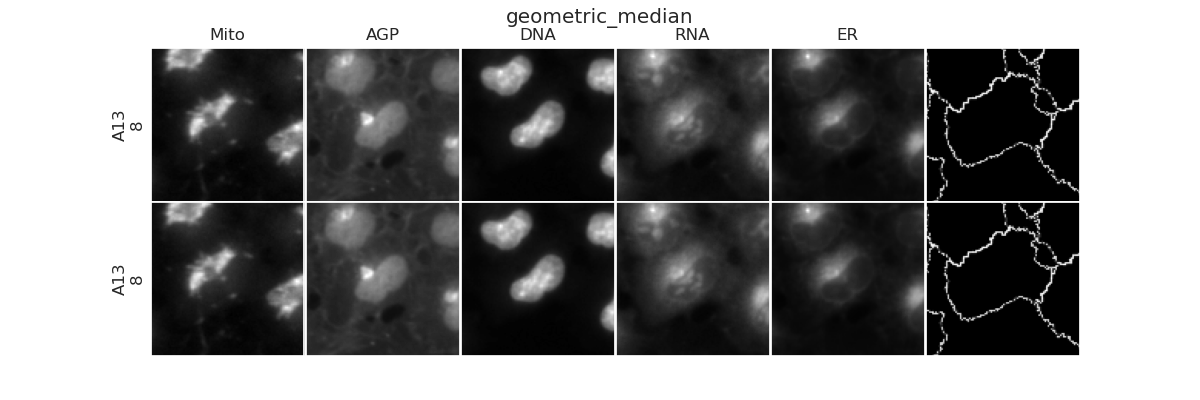

CPU times: user 17.7 s, sys: 7.11 s, total: 24.8 s
Wall time: 27.3 s


In [4]:
%%time
df_p_s=df_p_s0.copy()

dataset_rootdir="/home/ubuntu/bucket/projects/2015_10_05_DrugRepurposing_AravindSubramanian_GolubLab_Broad/"
images_dir=dataset_rootdir+"2016_04_01_a549_48hr_batch1_compressed/"

for ch in channels:
    df_p_s["PathName_Orig"+ch]=images_dir+"images/"+df_p_s["Image_Metadata_Plate"].astype(str)
    df_p_s["FileName_Orig"+ch]=df_p_s["Image_FileName_Orig"+ch].apply(lambda x: x.replace("tiff","png"))

outlines_root_dir=dataset_rootdir+'/workspace/analysis/cell_outlines_Mito_Project/'

df_p_s["Path_Outlines"] = outlines_root_dir+\
df_p_s["Image_Metadata_Well"]+'-'+df_p_s["Image_Metadata_Plate"].astype(str)+'/outlines/'+\
df_p_s["Image_Metadata_Well"]+'_s'+df_p_s["Image_Metadata_Site"].astype(int).astype(str)+'--cell_outlines.png'

 
cell_selection_method='geometric_median'

df_samples,cp_features_analysis = extract_single_cell_samples.extract_single_cell_samples(df_p_s,n_cells,cell_selection_method);
y_labels=["Image_Metadata_Well","Image_Metadata_Site"]
visualize_n_SingleCell.visualize_n_SingleCell(channels,df_samples,box_size,\
            info_columns=y_labels,\
            outline=True,\
            title=cell_selection_method,\
            compressed=True,compressed_im_size=1080);

In [ ]:
Wall time: 36.2 

In [ ]:
ls /home/ubuntu/bucket/projects/2015_10_05_DrugRepurposing_AravindSubramanian_GolubLab_Broad/workspace/analysis/cell_outlines_Mito_Project/A10-SQ00015195

In [ ]:
# ls /home/ubuntu/bucket/projects/2015_10_05_DrugRepurposing_AravindSubramanian_GolubLab_Broad/workspace/analysis/2016_04_01_a549_48hr_batch1_Mito_Project/SQ00015195/analysis/A10-SQ00015195/outlines/

In [ ]:
ls /home/ubuntu/bucket/projects/2015_10_05_DrugRepurposing_AravindSubramanian_GolubLab_Broad/

In [ ]:
# def unarchive_file(f2unarchive,bucket_name,user_profile):
#     """
#     unarchive input file

#     Inputs:
#     bucket_name: eg, pooled-cell-painting, imaging-plateform
#     user_profile: profile name that is used for accessing the above bucket (check in sudo vim ~/.aws/credentials)
#     proj_path: path to the project eg,2018_11_20_Periscope_Calico/workspace/analysis/

#     output:
#     command to run
#     """

#     cmd='aws s3api  restore-object  --profile '+user_profile+\
#             ' --bucket '+bucket_name+'  --key projects/2018_11_20_Periscope_Calico/workspace/analysis/'+f2unarchive+'   --restore-request GlacierJobParameters={"Tier"="Standard"}'
#     return cmd




# for p in plates:
#     for w in wells:
#         for s in sites:
#             f2unarchive=batch+'/'+p+'-'+w+'-'+s+'/CorrDNA_Site_'+s+'_Overlay.png'
#             cmd='aws s3api  restore-object  --profile '+user_profile+\
#             ' --bucket '+bucket_name+'  --key projects/2018_11_20_Periscope_Calico/workspace/analysis/'+f2unarchive+'   --restore-request GlacierJobParameters={"Tier"="Standard"}'
#             print(cmd)
# #             os.system(cmd)